In [2]:
df = pd.read_csv("../data/df_final_processed.csv", index_col = 0)
df.head()

,datetime,level,rain,vel_wind,dir_wind,level_std,level_scaled,dist,dist_std,dist_scaled,ts,inv_dist,inv_dist_std,inv_dist_scaled,inv_dist_2,inv_dist_2_std,inv_dist_2_scaled
0,2010-01-01 00:00:00,102.0,0.0,0.2,337.5,2.461852,0.763636,353510.208614,-2.034933,0.043682,1262304000000000000,0.000003,2.156252,0.949046,8.001955e-12,2.219529,0.945147
1,2010-01-01 01:00:00,100.0,0.0,0.7,315.0,2.389875,0.754545,353731.458075,-2.020637,0.047277,1262307600000000000,0.000003,2.139458,0.944887,7.991948e-12,2.201361,0.940688
2,2010-01-01 02:00:00,86.0,0.0,1.5,247.5,1.886035,0.690909,354197.433405,-1.990529,0.054849,1262311200000000000,0.000003,2.104155,0.936144,7.970933e-12,2.163208,0.931324
3,2010-01-01 03:00:00,74.0,0.0,1.3,247.5,1.454172,0.636364,354875.253700,-1.946732,0.065863,1262314800000000000,0.000003,2.052969,0.923467,7.940513e-12,2.107977,0.917768
4,2010-01-01 04:00:00,65.0,0.0,1.3,247.5,1.130275,0.595455,355718.662776,-1.892236,0.079569,1262318400000000000,0.000003,1.989551,0.907761,7.902904e-12,2.039695,0.901010


# Creating dummy columns with extreme values

In [7]:
df.rain.describe()

count    78888.000000
mean         0.090782
std          0.744970
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         66.400000
Name: rain, dtype: float64

In [35]:

for i in np.arange(0.99, 1.,0.001):
    print(i,df.rain.quantile(i))

0.99 2.4
0.991 2.6
0.992 2.8
0.993 3.0
0.994 3.3999999999999995
0.995 3.8
0.996 4.4
0.997 5.2
0.998 6.6
0.999 9.6
1.0 66.4


In [36]:
threshold = df.rain.quantile(0.99)
threshold

2.4

In [37]:
df["dummy_rain"] = df.rain.map(lambda x: 0 if x < threshold else 1)

In [40]:
df.dummy_rain.

78888

In [ ]:
df.to_csv("../data/df_final_processed.csv")

In [38]:
df.dummy_rain.to_csv("../data/output/df_rain_dummy.csv", index = False)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [17]:
df.rain.median()

0.0

In [21]:
df.rain.unique().shape, len(df.rain)

((95,), 78888)

In [28]:
a = df.rain.value_counts()

for index, elem in enumerate(a): 
    print(a.index[index],elem)

0.0 73860
0.2 1462
0.4 697
0.6 457
0.8 376
1.0 300
1.2 241
1.4 182
1.6 160
1.8 135
2.0 109
2.2 106
2.4 89
2.6 81
2.8 66
3.0 49
3.2 43
3.6 42
3.4 35
3.8 29
4.4 28
5.0 22
4.0 21
4.2 19
4.8 18
5.4 16
6.4 14
5.6 14
6.6 14
5.8 13
4.6 13
5.2 12
7.4 12
6.8 11
6.0 8
7.6 8
6.2 7
10.0 6
8.0 6
9.2 5
8.8 5
12.2 5
9.4 5
10.8 4
7.2 4
8.6 4
11.4 3
8.2 3
10.4 3
9.8 3
11.6 3
10.6 3
11.2 3
9.6 3
7.0 3
14.2 2
21.0 2
14.8 2
12.0 2
10.2 2
18.8 2
8.4 2
11.8 2
17.8 1
17.2 1
7.8 1
18.0 1
17.4 1
13.6 1
14.6 1
38.4 1
16.6 1
21.4 1
30.2 1
13.4 1
35.8 1
35.6 1
18.2 1
13.2 1
23.0 1
15.4 1
16.8 1
36.0 1
15.0 1
15.2 1
9.0 1
19.2 1
66.4 1
38.6 1
13.0 1
15.8 1
33.4 1
20.8 1
16.2 1
16.4 1


(0, 1)

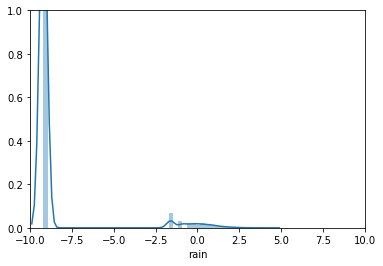

In [16]:
sns.distplot(df.rain.map(lambda x : np.log(x+0.0001)))
plt.xlim((-10,10))
plt.ylim((0,1))

In [39]:
df.vel_wind.value_counts()

0.6     3113
0.5     3111
0.4     3084
0.8     3052
0.7     3018
        ... 
8.3        1
8.4        1
9.6        1
8.8        1
10.4       1
Name: vel_wind, Length: 91, dtype: int64